## EDA Plan of Attack
- High level understanding of data (look at columns, nulls, shape, etc)
 - Understand relationship between columns (Multiple answer vs single answer)
 
 - Go through my process of learning to build model
- Start understanding the question "how feature effect on salary"

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #likley won't be used much as i'm experimenting with plotly 
import plotly.graph_objects as go #you will be learning how go and px work with me! 
import plotly.express as px 
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#load data 
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
transactions = pd.read_csv("transactions.csv")
oil = pd.read_csv("oil.csv")
holiday_events = pd.read_csv("holidays_events.csv")

In [3]:
#Merging all available datasets to perform exploratory data analysis
d1=pd.merge(holiday_events,oil)
d2=pd.merge(train,stores)
d3=pd.merge(d2,transactions)
df=pd.merge(d3,d1,on="date")

In [35]:
copy=pd.read_csv('test.csv')

In [5]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [6]:
#Shape of data
df.shape

(322047, 17)

In [7]:
#more of statistical 
df.describe()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,300003.000000
mean,1.682979e+06,26.994672,406.383452,3.727136,8.531202,1734.117840,64.077912
std,7.862493e+05,15.595174,1246.881240,15.512095,4.713809,1050.335018,25.147682
min,5.610000e+02,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,13.000000,1.000000,0.000000,4.000000,1030.000000,44.660000
50%,1.842406e+06,27.000000,19.000000,0.000000,9.000000,1409.000000,51.440000
75%,2.209556e+06,40.000000,241.260505,1.000000,13.000000,2148.000000,94.740000
max,3.000887e+06,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            322047 non-null  int64  
 1   date          322047 non-null  object 
 2   store_nbr     322047 non-null  int64  
 3   family        322047 non-null  object 
 4   sales         322047 non-null  float64
 5   onpromotion   322047 non-null  int64  
 6   city          322047 non-null  object 
 7   state         322047 non-null  object 
 8   type_x        322047 non-null  object 
 9   cluster       322047 non-null  int64  
 10  transactions  322047 non-null  int64  
 11  type_y        322047 non-null  object 
 12  locale        322047 non-null  object 
 13  locale_name   322047 non-null  object 
 14  description   322047 non-null  object 
 15  transferred   322047 non-null  bool   
 16  dcoilwtico    300003 non-null  float64
dtypes: bool(1), float64(2), int64(5), object(9)
memo

In [9]:
# check Nullvalues
df.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
transactions        0
type_y              0
locale              0
locale_name         0
description         0
transferred         0
dcoilwtico      22044
dtype: int64

In [10]:
## Let's see the so called duplicate rows 

df.duplicated().values.any()

False

In [11]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'transactions', 'type_y', 'locale',
       'locale_name', 'description', 'transferred', 'dcoilwtico'],
      dtype='object')

## issus 
 - date is float convert to date type
 - dcoilwtico rename into "daily_oil_prices_column"
 - store_nbr rename into "Store_no" 
 - onpromotion  rename into "no_item_promoted"


In [12]:
# rename columns
df.rename(columns={'dcoilwtico': 'daily_oil_prices', 'store_nbr': 'Store_no','onpromotion':'no_item_promoted'}, inplace=True)

In [13]:
#check
df.head()

,id,date,Store_no,family,sales,no_item_promoted,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,daily_oil_prices
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
1,73063,2013-02-11,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
2,73064,2013-02-11,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
3,73065,2013-02-11,1,BEVERAGES,172.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01
4,73066,2013-02-11,1,BOOKS,0.0,0,Quito,Pichincha,D,13,396,Holiday,National,Ecuador,Carnaval,False,97.01


In [14]:
#replace null values with the mean daily oil prices
df.loc[(df.daily_oil_prices.isnull()),'daily_oil_prices']=df.daily_oil_prices.mean()

In [15]:
#check nulls
df.daily_oil_prices.isnull().sum()

0

In [16]:
#Converting the date column from string to datetime dtype.
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

In [17]:
#check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                322047 non-null  int64         
 1   date              322047 non-null  datetime64[ns]
 2   Store_no          322047 non-null  int64         
 3   family            322047 non-null  object        
 4   sales             322047 non-null  float64       
 5   no_item_promoted  322047 non-null  int64         
 6   city              322047 non-null  object        
 7   state             322047 non-null  object        
 8   type_x            322047 non-null  object        
 9   cluster           322047 non-null  int64         
 10  transactions      322047 non-null  int64         
 11  type_y            322047 non-null  object        
 12  locale            322047 non-null  object        
 13  locale_name       322047 non-null  object        
 14  desc

In [18]:
#unique values 'family' categories.
df['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [19]:
df['family'].replace(['AUTOMOTIVE', 'HARDWARE', 'LAWN AND GARDEN', 'PLAYERS AND ELECTRONICS'], 'Tools', inplace = True)

df['family'].replace(['BEAUTY', 'LINGERIE', 'LADIESWEAR','PERSONAL CARE','CELEBRATION','MAGAZINES','BOOKS', 'BABY CARE'], 'LifeStyle', inplace = True)

df['family'].replace(['HOME APPLIANCES','HOME AND KITCHEN I', 'HOME AND KITCHEN II','HOME CARE','SCHOOL AND OFFICE SUPPLIES'], 'Home', inplace=True)

df['family'].replace([ 'GROCERY II', 'PET SUPPLIES','SEAFOOD','LIQUOR,WINE,BEER'], 'Food', inplace=True)

df['family'].replace(['DELI', 'EGGS'], 'Daily', inplace=True)

<AxesSubplot:xlabel='family'>

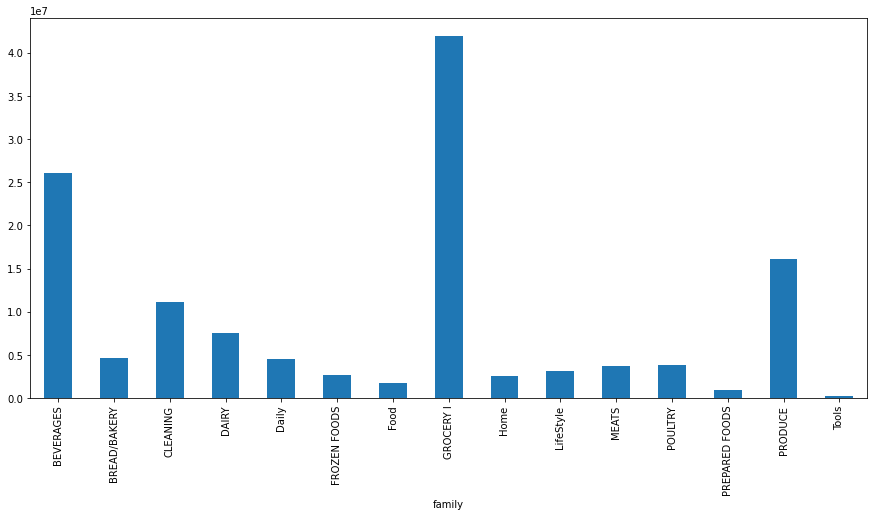

In [20]:
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=(15,7))
df.groupby("family").sum()['sales'].plot(kind='bar')

<AxesSubplot:xlabel='date', ylabel='sales'>

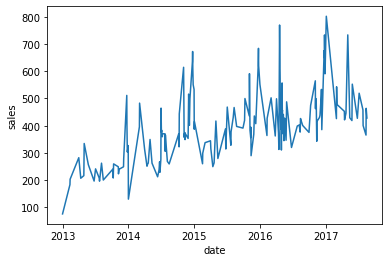

In [21]:
sns.lineplot(x='date',y='sales',data=df,ci=None,estimator='mean')

Text(0.5, 1.0, ' RelactionShip Between City and Sales ')

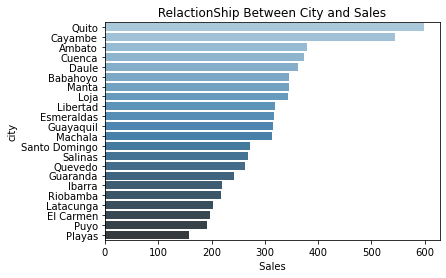

In [22]:
group=pd.DataFrame(df.groupby(['city'])['sales'].mean().sort_values(ascending=False))

sns.barplot(x='sales',y=group.index,data=group,
            palette="Blues_d",ci=90)
plt.xlabel(" City ")
plt.xlabel(" Sales ")
plt.title(" RelactionShip Between City and Sales ")

Quito is most sales
and Playas is less sales


In [23]:
df['city'].value_counts()[:10]

Quito            112266
Guayaquil         47784
Santo Domingo     16104
Cuenca            16005
Ambato            12804
Machala           12804
Latacunga         12606
Cayambe            6402
El Carmen          6402
Daule              6402
Name: city, dtype: int64

Text(0.5, 1.0, ' RelactionShip Between locale and Sales ')

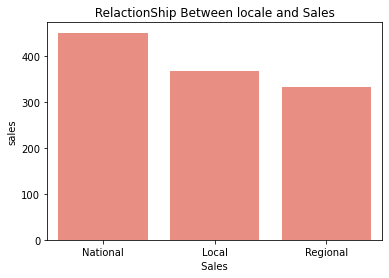

In [24]:
group=pd.DataFrame(df.groupby(['locale'])['sales'].mean().sort_values(ascending=False))
sns.barplot(x=group.index,y='sales',orient = 'v',color="salmon",data=group)
plt.xlabel(" locale ")
plt.xlabel(" Sales ")
plt.title(" RelactionShip Between locale and Sales ")

In [25]:
df['state'].value_counts()[:10]

Pichincha                         118668
Guayas                             66825
Santo Domingo de los Tsachilas     16104
Azuay                              16005
El Oro                             12804
Tungurahua                         12804
Los Rios                           12804
Cotopaxi                           12606
Manabi                             11979
Imbabura                            6402
Name: state, dtype: int64

In [26]:
#relasionshipe between state and family
"""
sns.catplot(x='state',y='family',kind="swarm",color="salmon",data=df)
plt.xlabel(" state ")
plt.xlabel(" family ")
plt.title(" RelactionShip Between family and State ")"""

'\nsns.catplot(x=\'state\',y=\'family\',kind="swarm",color="salmon",data=df)\nplt.xlabel(" state ")\nplt.xlabel(" family ")\nplt.title(" RelactionShip Between family and State ")'

C:\Users\Omnia Hosny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' RelactionShip Between locale and Sales ')

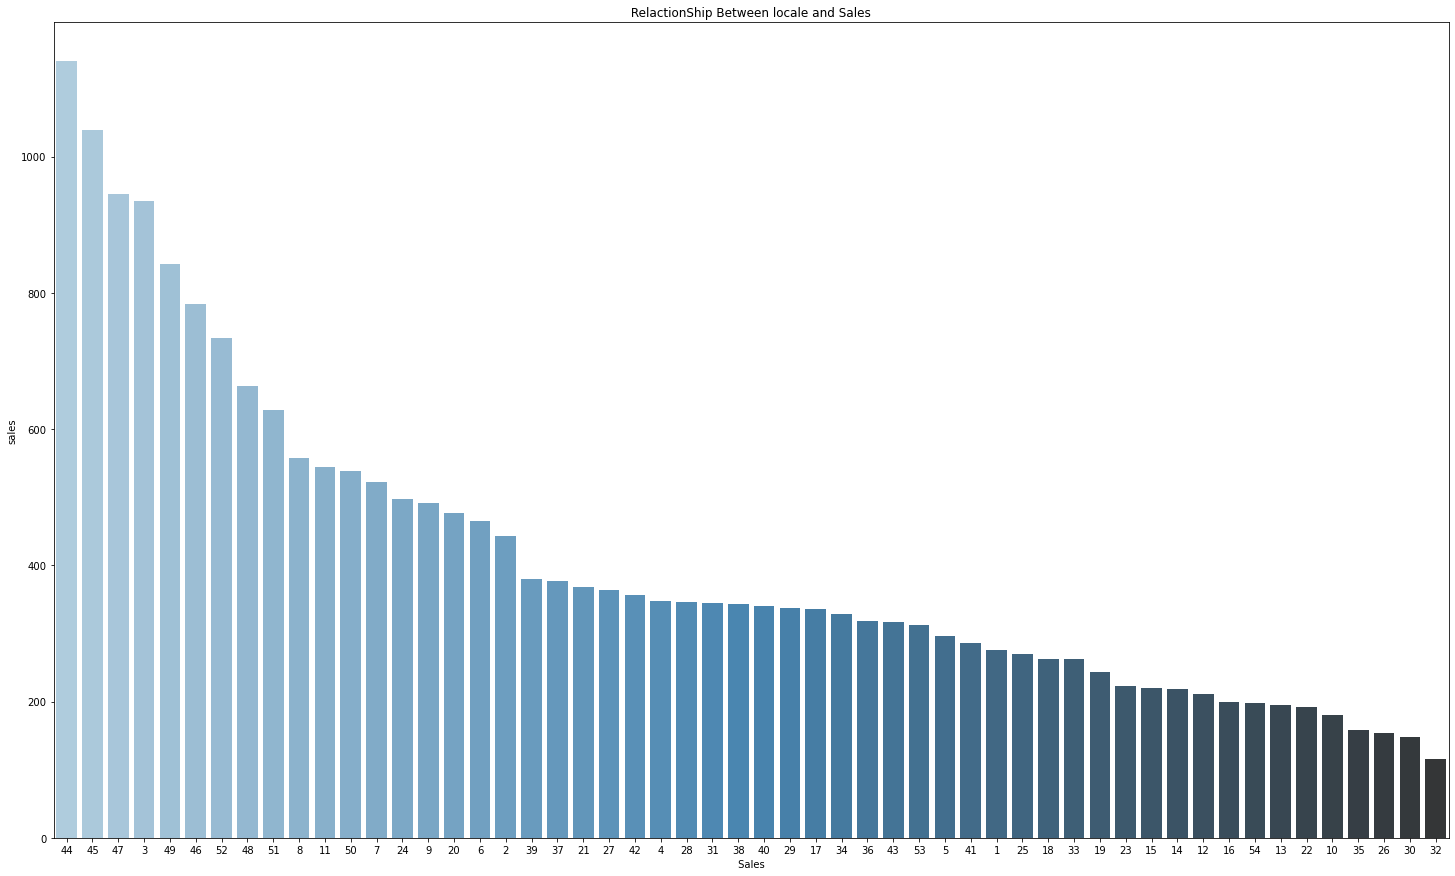

In [27]:
group=pd.DataFrame(df.groupby(['Store_no'])['sales'].mean().sort_values(ascending=False))
ax,f=plt.subplots(figsize=(25,15))
sns.barplot(group.index,y='sales',data=group,ax=None,ci=None, palette="Blues_d",order=group.index)
plt.xlabel(" store number ")
plt.xlabel(" Sales ")
plt.title(" RelactionShip Between locale and Sales ")


Text(0.5, 1.0, ' RelactionShip Between transferred and transactions')

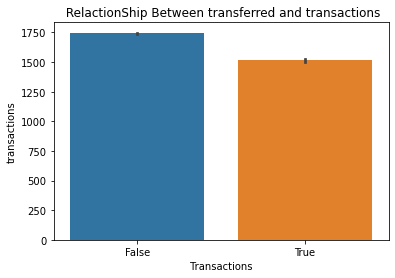

In [28]:
sns.barplot(x='transferred',y='transactions',data=df)
plt.xlabel(" Transferred ")
plt.xlabel(" Transactions ")
plt.title(" RelactionShip Between transferred and transactions")

# baseModel

In [29]:
#splitting the train dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'sales'], train['sales'], test_size=0.33, random_state=42)

In [30]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the categorical features
cat_attribs = ['id','date','family']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
test=encoder.transform(test)
# train the model
model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)

# extract the training set predictions
model.predict(X_train)


# extract the test set predictions
model.predict(X_test)


[06:26:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 16274 extra nodes, 0 pruned nodes, max_depth=20
[06:28:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 19292 extra nodes, 0 pruned nodes, max_depth=20
[06:31:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 18294 extra nodes, 0 pruned nodes, max_depth=20
[06:32:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 15536 extra nodes, 0 pruned nodes, max_depth=20
[06:34:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 12958 extra nodes, 0 pruned nodes, max_depth=20
[06:35:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end

array([2.5322014e+03, 1.3707391e+00, 1.8625356e+02, ..., 3.4886808e+00,
       4.5413814e+00, 2.4844824e+02], dtype=float32)

In [31]:
#accuracy
model.score(X_test, y_test)


0.847088248806254

In [32]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [36]:
pred1=model.predict(test)
pred=pd.DataFrame(pred1)


pred.rename(columns={0:'sales'},inplace=True)
pred.index=copy['id']
pred

,sales
id,
3000888,8.958672
3000889,8.958672
3000890,36.428967
3000891,2128.404541
3000892,8.958672
...,...
3029395,490.657837
3029396,78.221046
3029397,1403.536133


In [37]:
pred.to_csv('submission.csv')